In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

File ‘Food-5K.zip’ already there; not retrieving.



In [0]:
!unzip -o Food-5K.zip

In [5]:
!ls

data	    Food-5K	 __MACOSX     training
evaluation  Food-5K.zip  sample_data  validation


In [0]:
!ls training

In [0]:
!ls Food-5K/training

In [0]:
!mv Food-5K/* .

In [7]:
!ls

data	    Food-5K	 __MACOSX     training
evaluation  Food-5K.zip  sample_data  validation


In [8]:
plt.imshow(image.load_img('training/0_120.jpg'))
plt.show()

FileNotFoundError: ignored

In [4]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [9]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/food
!mkdir data/test/nonfood

mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/train/food’: File exists
mkdir: cannot create directory ‘data/train/nonfood’: File exists
mkdir: cannot create directory ‘data/test/food’: File exists
mkdir: cannot create directory ‘data/test/nonfood’: File exists


In [0]:
!mv training/1*.jpg data/train/food/
!mv training/0*.jpg data/train/nonfood/
!mv validation/1*.jpg data/test/food
!mv validation/0*.jpg data/test/nonfood

In [0]:
train_path = 'data/train'
test_path = 'data/test'

In [0]:
IMAG_SIZE = [200, 200]

In [0]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(test_path+'/*/*.jpg')

In [13]:
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/nonfood']

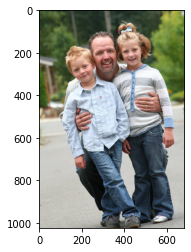

In [14]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
ptm = PretrainedModel(input_shape=IMAG_SIZE+[3],
                      weights = 'imagenet',
                      include_top=False)

In [0]:
ptm.trainable = False

In [0]:
K = len(folders)
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [0]:
model = Model(inputs=ptm.input, outputs=x)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.1,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         preprocessing_function=preprocess_input)

In [22]:
batch_size = 128
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAG_SIZE,
    batch_size=batch_size
)
valid_generator = gen.flow_from_directory(
    test_path,
    target_size=IMAG_SIZE,
    batch_size=batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
r = model.fit(train_generator, validation_data=valid_generator, epochs=10,
              steps_per_epoch=int(np.ceil(len(image_files)/ batch_size)),
              validation_steps=int(np.ceil(len(valid_image_files) / batch_size)))

Epoch 1/10
24/24 [==============================] - 54s 2s/step - loss: 0.1303 - accuracy: 0.9907 - val_loss: 0.6142 - val_accuracy: 0.9690
Epoch 2/10
24/24 [==============================] - 55s 2s/step - loss: 0.1527 - accuracy: 0.9927 - val_loss: 0.6303 - val_accuracy: 0.9710
Epoch 3/10
24/24 [==============================] - 54s 2s/step - loss: 0.1542 - accuracy: 0.9873 - val_loss: 0.7904 - val_accuracy: 0.9760
Epoch 4/10
24/24 [==============================] - 54s 2s/step - loss: 0.0673 - accuracy: 0.9950 - val_loss: 0.9413 - val_accuracy: 0.9730
Epoch 5/10
24/24 [==============================] - 54s 2s/step - loss: 0.1703 - accuracy: 0.9933 - val_loss: 1.1700 - val_accuracy: 0.9680
Epoch 6/10
24/24 [==============================] - 53s 2s/step - loss: 0.1238 - accuracy: 0.9933 - val_loss: 0.9580 - val_accuracy: 0.9730
Epoch 7/10
24/24 [==============================] - 54s 2s/step - loss: 0.1146 - accuracy: 0.9937 - val_loss: 1.5982 - val_accuracy: 0.9610
Epoch 8/10
24/24 [==

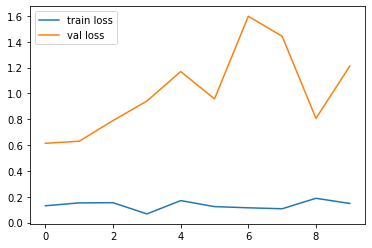

In [31]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

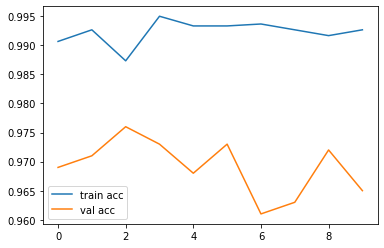

In [32]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()